셀레니움 사용을 고려하는 상황
- 비동기 통신에 의한 페이지 로딩이 힘든 경우
 - html에서 데이터를 가지고 와야 하는데 안나올 때
 - fetch/xhr 확인을 해봤는데 API도 없을 때 

In [1]:
YOUTUBE_ENDGAME_VIDEO_URL = "https://www.youtube.com/watch?v=Ko2NWhXI9e8&t=20s"

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def get_chrome_driver():
    # 1. 브라우저 옵션 세팅
    chrome_options = webdriver.ChromeOptions()
    
    # 2. driver 생성
    driver = webdriver.Chrome(
        service= Service(ChromeDriverManager().install()),
        options=chrome_options
    )
    
    return driver

In [3]:
driver = get_chrome_driver()

In [4]:
driver.get(YOUTUBE_ENDGAME_VIDEO_URL)

In [5]:
# 스크린샷 저장
driver.save_screenshot("endgame_10s_screenshot.png")
driver.quit()

In [6]:
# element만 캡쳐
from selenium.webdriver.common.by import By

driver = get_chrome_driver()
driver.get(YOUTUBE_ENDGAME_VIDEO_URL)

movie_player = driver.find_element(
    By.CSS_SELECTOR,
    "#movie_player")

In [ ]:
# 영상 가운데 큰 재생버튼 눌러주기
'''
try:
    driver.find_element(
        By.CSS_SELECTOR,
        ".ytp-large-play-button.ytp-button"
    ).click()
except:
    pass
'''

In [ ]:
# 전체화면 캡쳐 후 elment 따오기

In [7]:
# element의 위치 찾기(좌상단 좌표 - left-top location)
location = movie_player.location
location

{'x': 24, 'y': 80}

In [8]:
size = movie_player.size
size

{'height': 360, 'width': 640}

In [9]:
left = location['x']
top = location['y']
right = left + size['width']
bottom = top + size['height']

area = (left, top, right, bottom)
area

(24, 80, 664, 440)

PIL 라이브러리를 사용 
- Python Image Library
- 요즘에는 OpenCV 활용

In [10]:
from PIL import Image as pil

In [11]:
#스크린샷 찍기
driver.save_screenshot("./ironman_mask.png")
driver.quit()

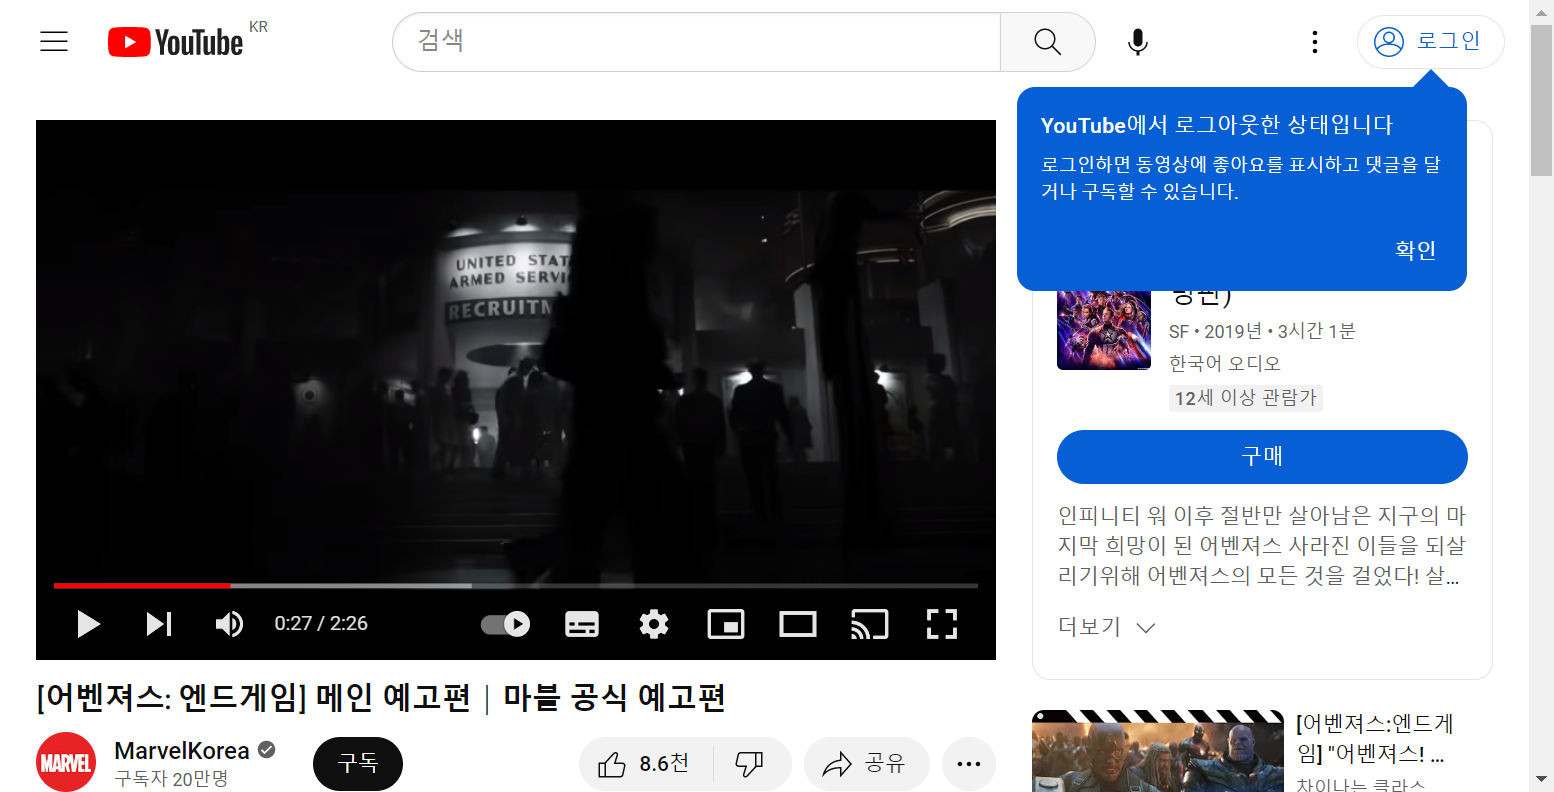

In [12]:
pil_img = pil.open("./ironman_mask.png")
pil_img

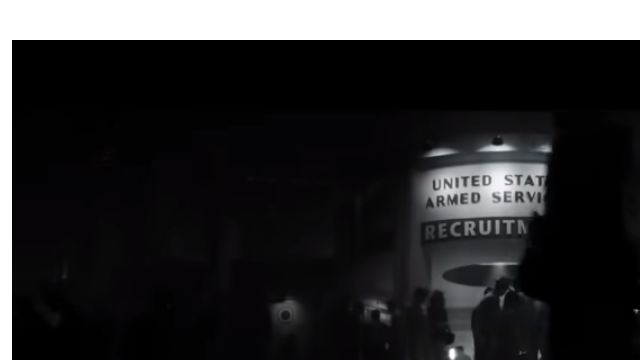

In [13]:
crop_img = pil_img.crop(area)
crop_img

In [ ]:
#crop_img.save("crop_ironman_mask.png")

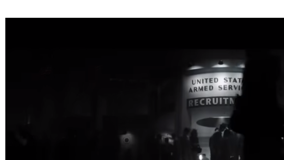

In [14]:
# 썸네일 만들기
crop_img.thumbnail((320, 160))
crop_img

## Youtube 영상 다운로드

In [15]:
def download(title, link):
    response = requests.get(link, stream=True)
    save_path, size = "{}".format(title), 0
    with open(save_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                size += 1024
                f.write(chunk)
    return size

In [16]:
# youtube 영상 다운하려면 www.youtube.com -> ssyoutube.com
YOUTUBE_MOVIE_DOWNLOAD_URL = "https://youtube.com/watch?v=Ko2NWhXI9e8"

driver = get_chrome_driver()
driver.get(YOUTUBE_MOVIE_DOWNLOAD_URL)

In [ ]:
download_button = driver.find_element(
    By.CSS_SELECTOR,
    "#sf_result > div > div > div.info-box > div.link-box > div.def-btn-box > a"
)

In [ ]:
#셀레니움을 통한 attribute 수집
title = download_button.get_attribute("download")
download_source = download_button.get_attribute("href")

title.download_source

In [ ]:
import requests

size = download(title, download_source)
size

In [ ]:
print("{:.3f} Mb".format(size/1024/1024))

In [18]:
driver.quit()